
In this project, I will use the data files I retrieved in the duration of my summer internship to study user interactions, such as average session duration, bounce rate, and pages per session segmented by device type and new vs returning users.  The data that I will be using is the Google Analytics 4 traffic data, as retrieved from cookies integrated into the Hunter Library Website.  To do this, I would primarily use clustering and segmentation to identify distinct user behavior groups.  Additionally, I would like to explore regression, predicting engagement metrics based on user attributes.  I have the written permission with my direct supervisor to use this data.

In [ ]:
"""
Understanding the structure of the dataset, identify
data types, and missing values.  Get sense of mean, median etc.
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('GA4.xlsx')

print(df.head())

print(df.info())

print(df.describe())

# Check for any null values in the dataset.
print(df.isnull().sum())

  newVsReturning platformDeviceCategory  \
0            new          web / desktop   
1      returning          web / desktop   
2      returning           web / mobile   
3      returning           web / tablet   
4            new          web / desktop   

                                           pageTitle  averageSessionDuration  \
0  PEST Analyses - Company, Industry, & Market In...             3248.135844   
1  PREVIEW Home - English 190: Adams - Research G...             2424.863532   
2  Have books delivered to you! - For Distance an...             1786.957374   
3  REVIEW / synthesize, publish, & present - Heal...             1762.844032   
4  SWOT Analyses - MBA 643: Integrative Strategic...             1718.914025   

   bounceRate  engagementRate  screenPageViews  eventCount  
0         0.0             1.0                4           4  
1         0.0             1.0                2           2  
2         0.0             1.0                1           1  
3         0.0   

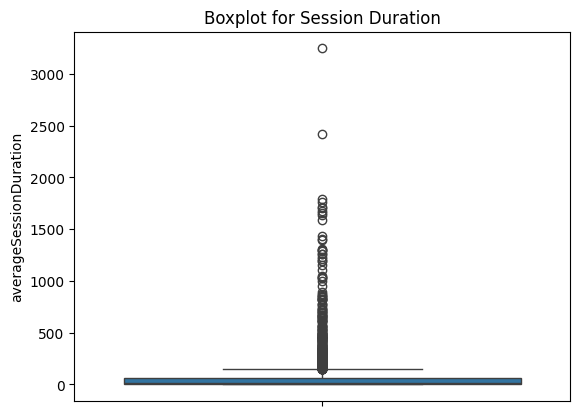

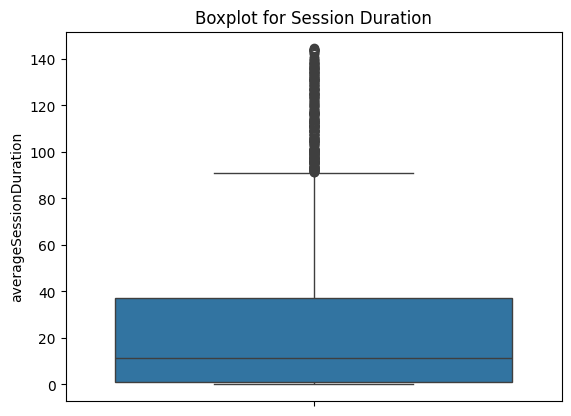

Index(['newVsReturning', 'platformDeviceCategory', 'pageTitle',
       'averageSessionDuration', 'bounceRate', 'engagementRate',
       'screenPageViews', 'eventCount'],
      dtype='object')


In [ ]:
"""
Remove extreme values from session duration, our most important variable,
using the IQR method to prevent skew. The IQR method determines that any point
1.5 points below the first quartile and 1.5 points above the third quartile are
outliers.  Thus we can drop them.
"""


# Visualize session duration using a boxplot
sns.boxplot(df['averageSessionDuration'])
plt.title('Boxplot for Session Duration')
plt.show()


Q1 = df['averageSessionDuration'].quantile(0.25)
Q3 = df['averageSessionDuration'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Revisualize data
data = df[(df['averageSessionDuration'] >= lower_bound) & (df['averageSessionDuration'] <= upper_bound)]
sns.boxplot(data['averageSessionDuration'])
plt.title('Boxplot for Session Duration')
plt.show()
print(data.columns)


In [ ]:
"""
Convert categorical values into numerical values
for clustering and segmentation.
"""
# Standardizing numeric columns for clustering

numeric_columns = [
    "averageSessionDuration",
    "bounceRate",
    "engagementRate",
    "screenPageViews",
    "eventCount",
]

data = pd.get_dummies(data, columns=['platformDeviceCategory', 'newVsReturning'], drop_first=False)
print(data.columns)
print(data.head())


Index(['pageTitle', 'averageSessionDuration', 'bounceRate', 'engagementRate',
       'screenPageViews', 'eventCount', 'platformDeviceCategory_web / desktop',
       'platformDeviceCategory_web / mobile',
       'platformDeviceCategory_web / smart tv',
       'platformDeviceCategory_web / tablet', 'newVsReturning_(not set)',
       'newVsReturning_new', 'newVsReturning_returning'],
      dtype='object')
                                             pageTitle  \
431  Pre-Design Considerations - DegreePlus Poster ...   
432  Home - Genealogy - Research Guides at Western ...   
433  Legal Research - Law and Legal Resources - Res...   
434  Home - Recreation Therapy 380 - Research Guide...   
435  Sarah Steiner - Research Guides at Western Car...   

     averageSessionDuration  bounceRate  engagementRate  screenPageViews  \
431              144.541036    0.000000        1.000000               10   
432              144.098384    0.380368        0.619632              200   
433              

In [ ]:
"""
Normalize numerical values for uniform scaling.
"""
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(data[numeric_columns]), columns=numeric_columns)
data[numeric_columns] = df_scaled
print(data.head())
print(data.columns)

                                             pageTitle  \
431  Pre-Design Considerations - DegreePlus Poster ...   
432  Home - Genealogy - Research Guides at Western ...   
433  Legal Research - Law and Legal Resources - Res...   
434  Home - Recreation Therapy 380 - Research Guide...   
435  Sarah Steiner - Research Guides at Western Car...   

     averageSessionDuration  bounceRate  engagementRate  screenPageViews  \
431                1.370059   -0.020118        0.020118        -0.074255   
432                1.364647   -0.889980        0.889980         0.214956   
433                1.359956   -0.449625        0.449625         0.421535   
434                1.352579   -0.930439        0.930439        -0.037071   
435                1.351355   -0.852132        0.852132        -0.010215   

     eventCount  platformDeviceCategory_web / desktop  \
431   -0.082930                                  True   
432    0.090018                                  True   
433    0.441717        

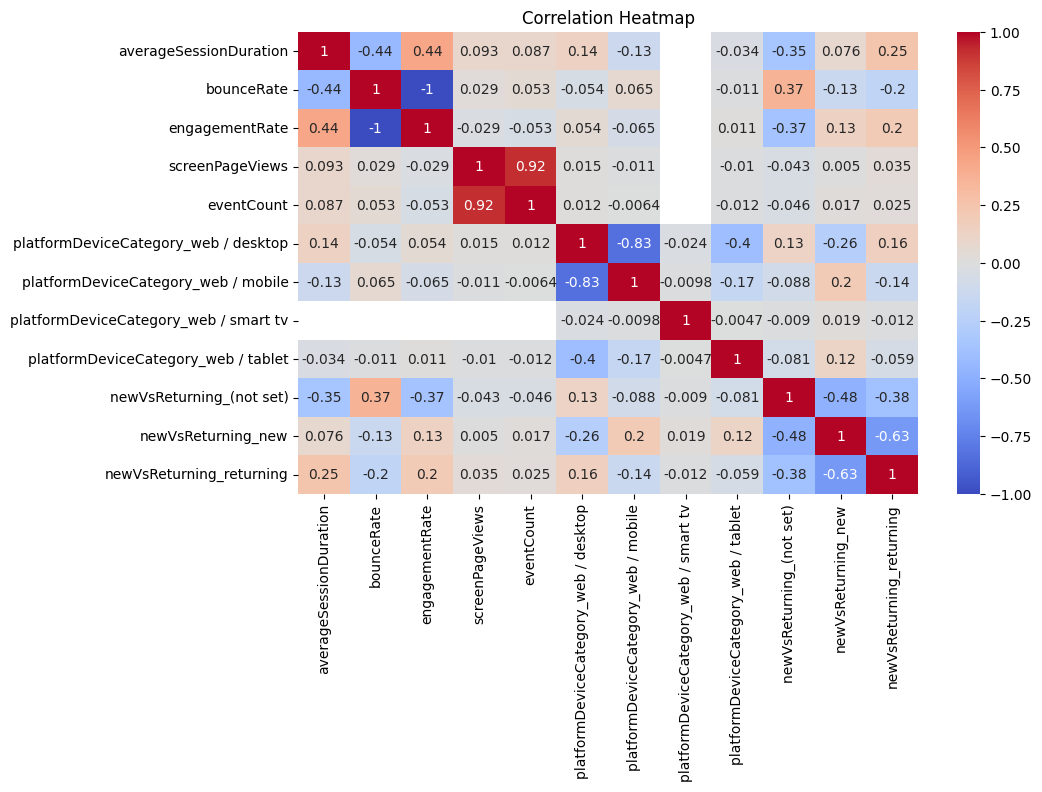

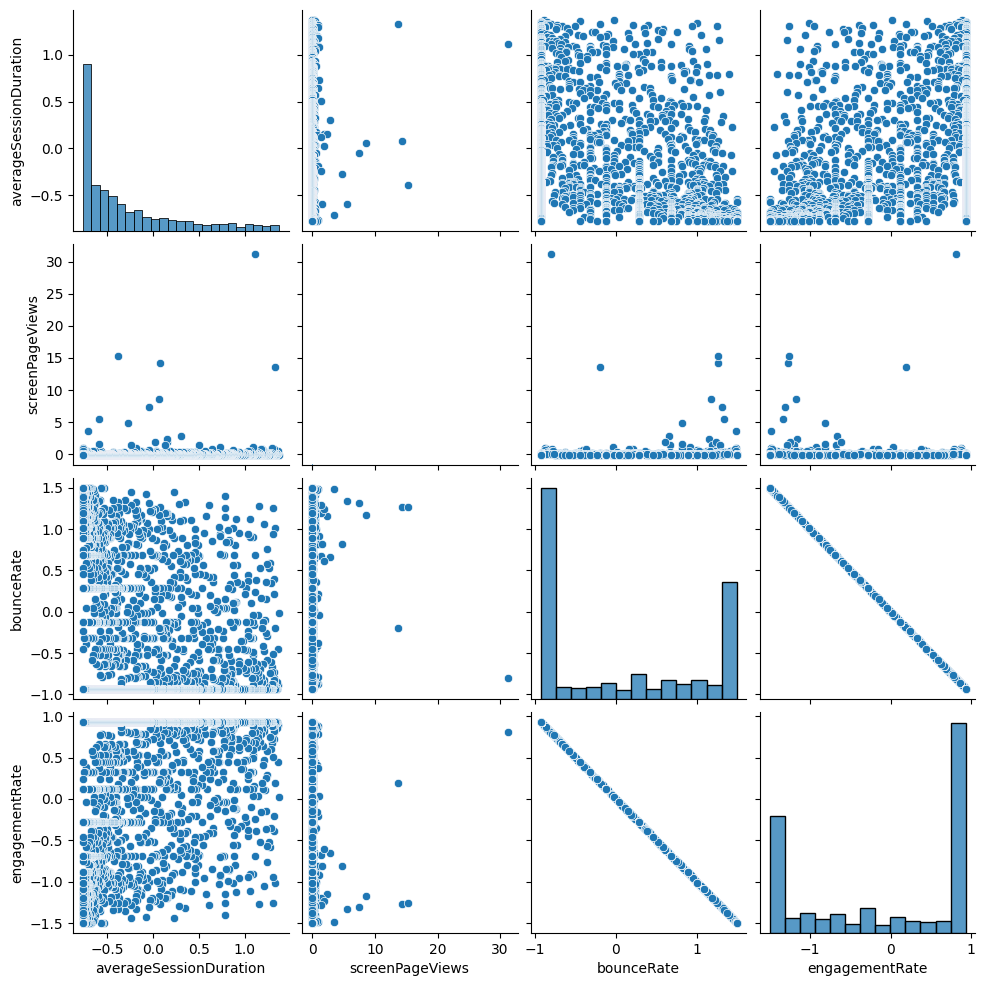

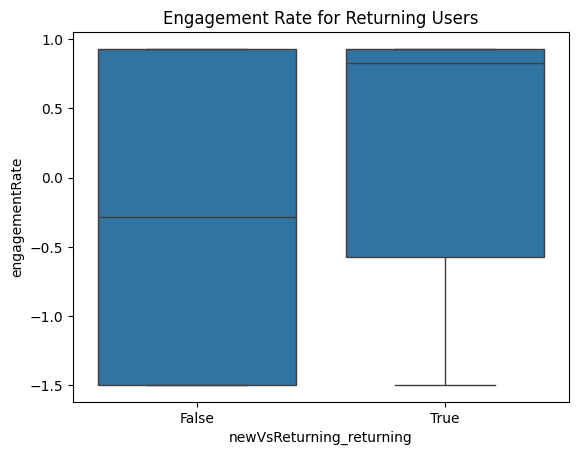

In [ ]:
"""
Visualize the correlation between numerical variables.
"""

page_titles = data['pageTitle']
data.drop(columns=['pageTitle'], axis=1, inplace=True)

plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for relationships & display boxplot for returning visitors
sns.pairplot(data[['averageSessionDuration', 'screenPageViews', 'bounceRate', 'engagementRate']])
plt.show()

sns.boxplot(x='newVsReturning_returning', y='engagementRate', data=data)
plt.title('Engagement Rate for Returning Users')
plt.show()



In [ ]:
#data.drop(columns=['platformDeviceCategory_web / smart tv'], axis=1, inplace=True)
# Drop any null values
data.dropna(inplace=True)


**Summary and Findings**

1.) Missing Values:  There were no missing values in the dataset to account for, as all misses are represented as a zero.  

2.) Outliers:  Removed extreme outliers from session duration as it had extreme values skewing the dataset.

3.) Pre-processing:  Encoded categorical variables using dummy variables for regression and clustering.  Then, I normalized the numerical variables for more uniform scaling of the data.  

**Preliminary Findings**

Engaged sessions and screen page views are correlated, suggesting the more pages a user views, the more engaged they are in the site.  Returning users have a significantly higher engagement rate, suggesting more engagement with the site in comparison with new users, suggesting a certain amount of learning curve to the site.  The data is now ready for advanced analysis.


Text(0.5, 1.0, 'Elbow Method for Optimal K')

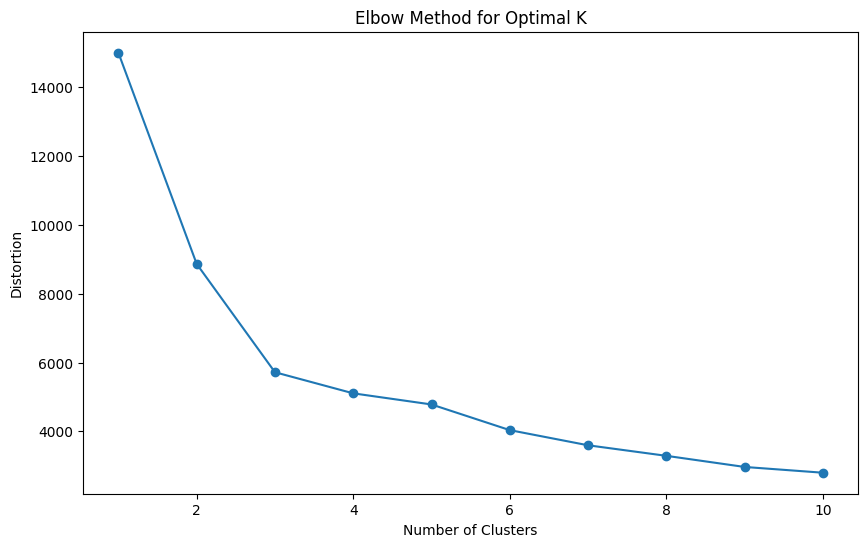

In [ ]:
"""
Use K-means unsupervised clustering algorithm to find patterns in data,
segmenting users into distinct groups based on their behavior,
such as average session duration, bounce rate, and pages per session.

Here, we are using the elbow method to determine the ideal number of clusters
to use in our algorithm.  We randomly initialize k clusters and iteratively
adjust the clusters till they hit equilibrium, where 11 is our hyper-parameter.

"""

from sklearn.cluster import KMeans


distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal K')




In [ ]:
# """
# Build regression model for predicting engagement rate and evaluate
# the model.
# """

# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from sklearn.linear_model import Ridge

# X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['engagementRate']), data['engagementRate'], test_size=0.2, random_state=42)

# model = LinearRegression()
# model.fit(X_train, y_train)

# # Evaluate how well the model fits
# y_pred = model.predict(X_test)

# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f'Mean Absolute Error: {mae}')
# print(f'Mean Squared Error: {mse}')
# print(f'R-squared: {r2}')

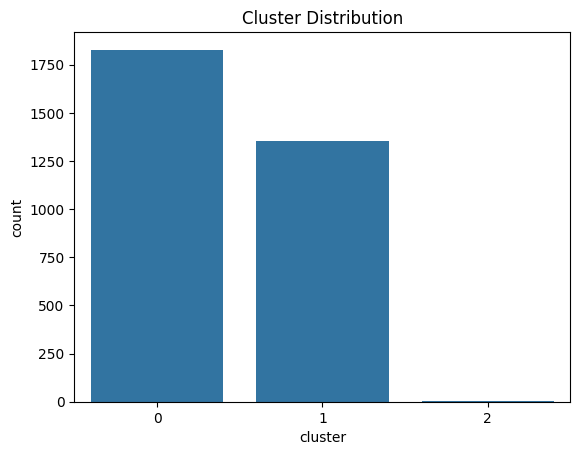

         averageSessionDuration  bounceRate  engagementRate  screenPageViews  \
cluster                                                                        
0                     -0.082509   -0.747923        0.747923        -0.068991   
1                     -0.608208    1.176760       -1.176760        -0.037831   
2                      0.357178    0.669077       -0.669077        15.053540   

         eventCount  
cluster              
0         -0.076997  
1         -0.023785  
2         17.227902  


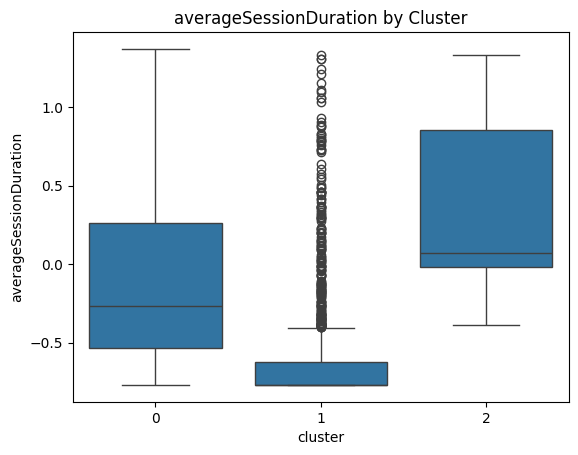

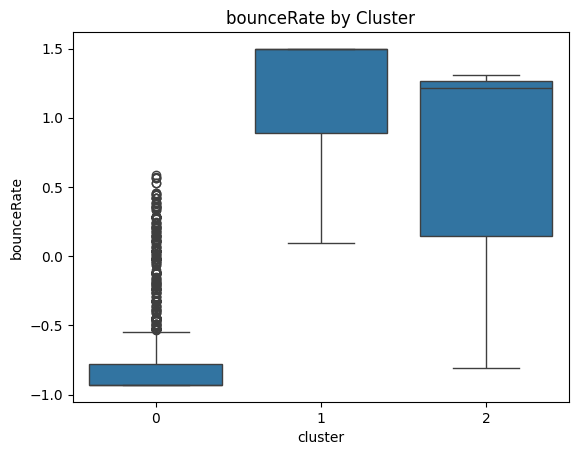

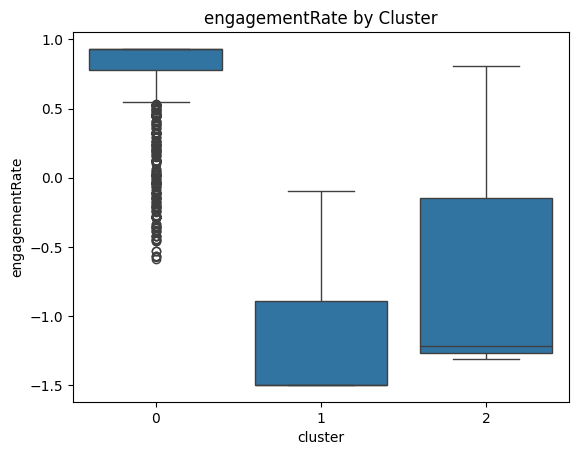

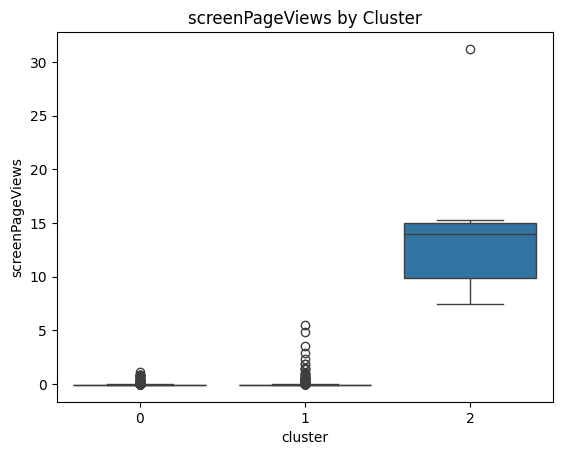

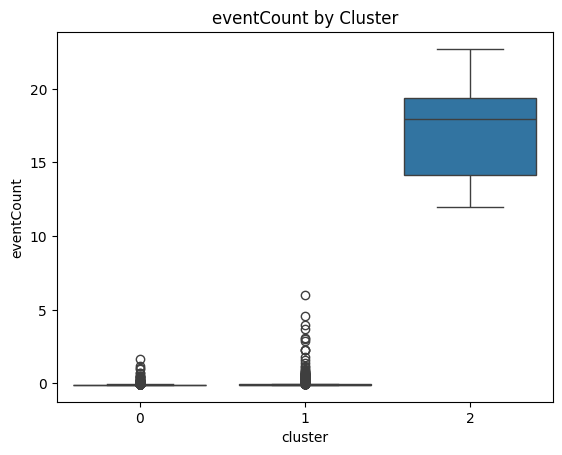

In [ ]:
"""
Now that we found the elbow point, where adding additional clusters has diminishing returns
we can use the k value to fit our model and segment the data.  Thus, the number of clusters
we will use is 3.
"""


hyperparam = 3
kmeans = KMeans(n_clusters=hyperparam, init='k-means++', random_state=42)
data['cluster'] = kmeans.fit_predict(data.drop(columns=['engagementRate']))


# EDA updates with clustering applied

# Cluster distribution

sns.countplot(data=data, x="cluster")
plt.title("Cluster Distribution")
plt.show()


# Average metrics by cluster
cluster_means = data.groupby("cluster")[numeric_columns].mean()
print(cluster_means)

# Visualization of metrics by cluster
for col in numeric_columns:
    sns.boxplot(data=data, x="cluster", y=col)
    plt.title(f"{col} by Cluster")
    plt.show()



(3, 11)


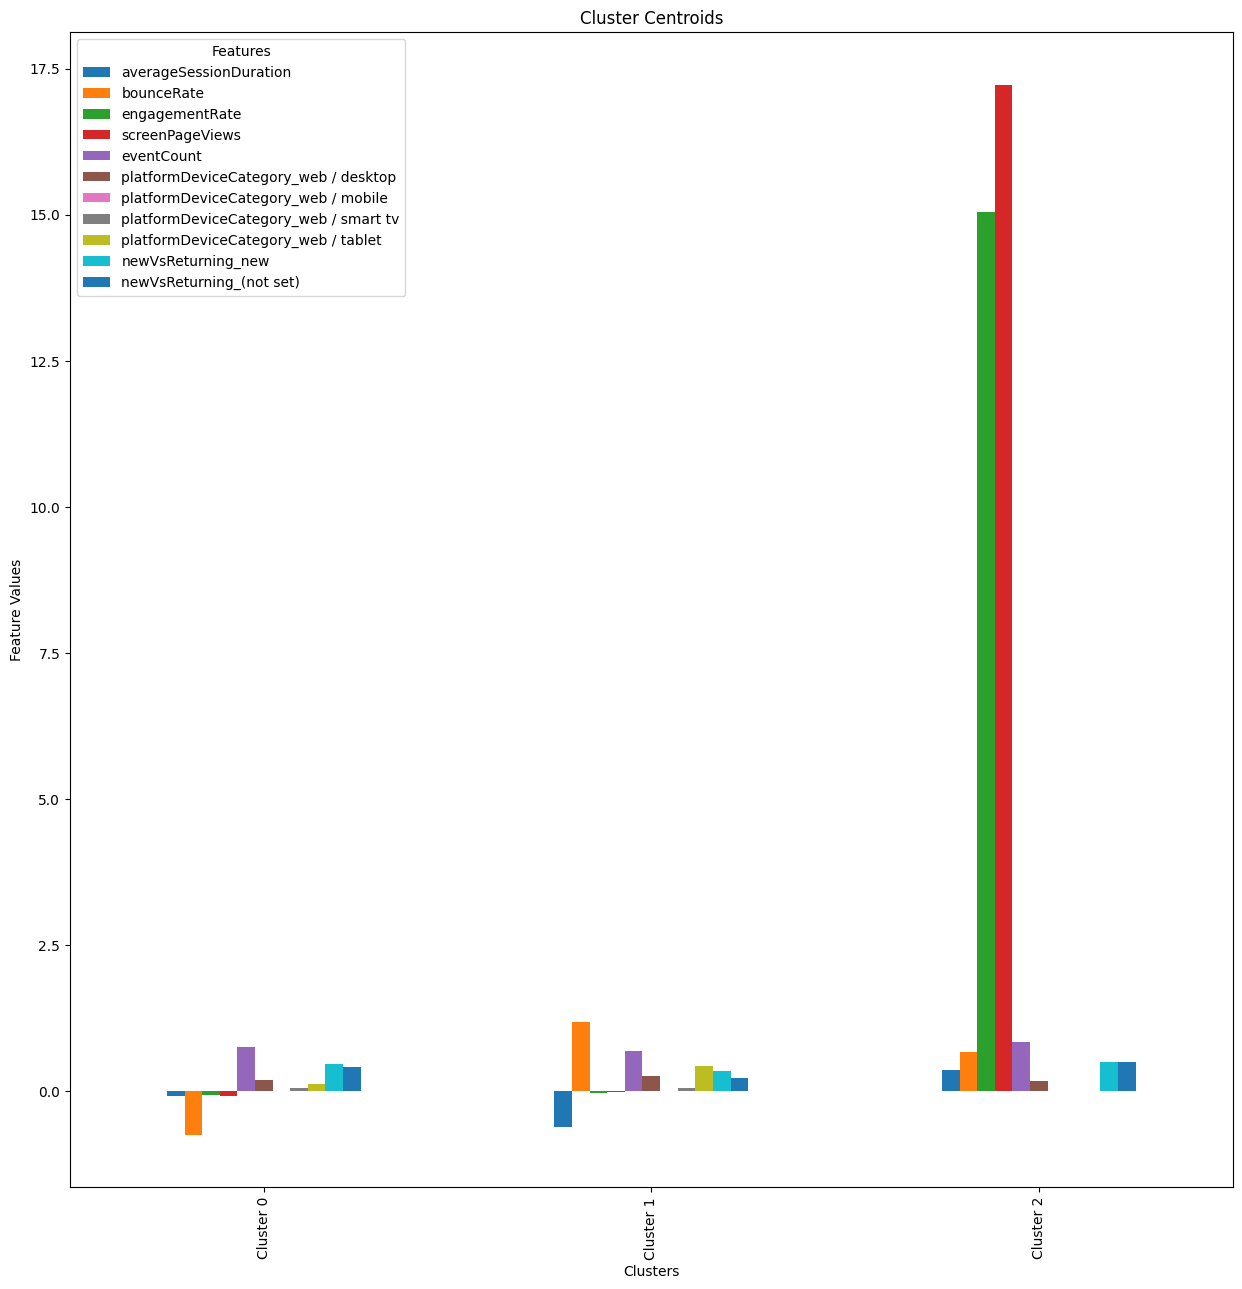

In [ ]:
"""
Now, we need to visualize our clusters based on their key features,
such as average session duration, bounce rate, and pages per session.
"""

# # Mark the centroids
centroids = kmeans.cluster_centers_
# plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, linewidths=3, color='red')


# Correct column list to match the number of features in `centroids`
centroid_columns = ['averageSessionDuration', 'bounceRate', 'engagementRate', 'screenPageViews',
                    'eventCount', 'platformDeviceCategory_web / desktop',
                    'platformDeviceCategory_web / mobile', 'platformDeviceCategory_web / smart tv',
                    'platformDeviceCategory_web / tablet', 'newVsReturning_new',
                    'newVsReturning_(not set)']

# Create DataFrame for centroids
centroids_df = pd.DataFrame(centroids, columns=centroid_columns)
centroids_df.index = [f'Cluster {i}' for i in range(len(centroids))]

# Plot the centroids as a bar chart
centroids_df.plot(kind='bar', figsize=(15, 15))
plt.title('Cluster Centroids')
plt.xlabel('Clusters')
plt.ylabel('Feature Values')
plt.legend(title='Features')
plt.show()

   cluster  averageSessionDuration_mean  averageSessionDuration_median  \
0        0                    -0.082509                      -0.269211   
1        1                    -0.608208                      -0.769966   
2        2                     0.357178                       0.067886   

   averageSessionDuration_std  bounceRate_mean  bounceRate_median  \
0                    0.566979        -0.747923          -0.930439   
1                    0.343040         1.176760           1.497082   
2                    0.693481         0.669077           1.218288   

   bounceRate_std  engagementRate_mean  engagementRate_median  \
0        0.350325             0.747923               0.930439   
1        0.415538            -1.176760              -1.497082   
2        0.927281            -0.669077              -1.218288   

   engagementRate_std  ...  platformDeviceCategory_web / tablet_std  \
0            0.350325  ...                                 0.238885   
1            0.415538  

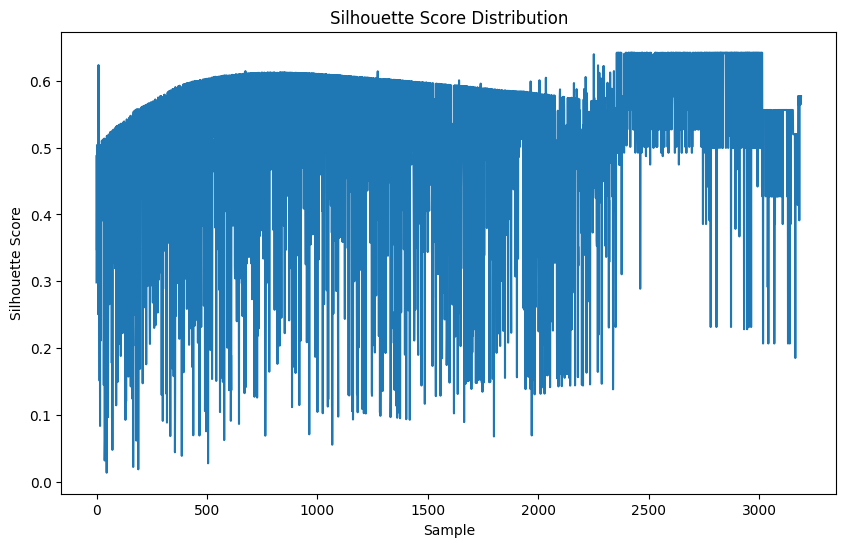

In [ ]:
"""
Generate a summary of each cluster's key stats & evaluate the clustering
quality using silhouette score.
"""
from sklearn.metrics import silhouette_score, silhouette_samples

cluster_stats = data.groupby('cluster').agg(['mean', 'median', 'std'])
cluster_stats.columns = ['_'.join(col) for col in cluster_stats.columns]
cluster_stats.reset_index(inplace=True)
print(cluster_stats)

data.to_csv("kmeans_clustered_data.csv", index=False)
cluster_stats.to_csv("kmeans_cluster_summary.csv", index=False)



score = silhouette_score(data, data['cluster'])
print(f"Silhouette Score: {score}")
silhouette_vals = silhouette_samples(data, data['cluster'], metric='euclidean')

# Visualize the silhouette score distribution.
plt.figure(figsize=(10, 6))
plt.plot(silhouette_vals)
plt.xlabel('Sample')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Distribution')
plt.show()

In [22]:
# Recalculate data for top pages
top_pages = df.groupby('pageTitle').agg({
    'averageSessionDuration': 'mean',
    'bounceRate': 'mean',
    'engagementRate': 'mean',
    'screenPageViews': 'mean',
    'eventCount': 'mean'
})

top_pages.reset_index(inplace=True)
#Sort by engagement rate, and then by eventCount within that
top_pages.sort_values(by=['engagementRate', 'eventCount'], ascending=[False, False], inplace=True)
print(top_pages.head())

top_pages.to_csv("top_pages.csv", index=False)

                                              pageTitle  \
468   Home - American History - Research Guides at W...   
1036  Scholarly Articles & Research Help - Chemistry...   
1075  Social Sciences - Writing in the Disciplines -...   
3     23/24 Refresher & Training - Acquiring Resourc...   
1021  STEM - Writing in the Disciplines - Research G...   

      averageSessionDuration  bounceRate  engagementRate  screenPageViews  \
468                37.147172         0.0             1.0        39.166667   
1036              207.653228         0.0             1.0        28.666667   
1075              104.474203         0.0             1.0        26.333333   
3                  65.204647         0.0             1.0        23.000000   
1021               30.844796         0.0             1.0        22.000000   

      eventCount  
468    40.166667  
1036   30.000000  
1075   27.000000  
3      24.000000  
1021   22.750000  


# Model Selection and Training Analysis and Commentary

I chose a K-Means unsupervised machine learning algorithm that clusters data into distinct groups based on similar features or behavior.  The aim of this model is to minimize variance within clusters, so data points in the cluster are as similar as possible, and data points in another cluster are as dissimilar as possible.

I chose the K-Means model because the data set provided has clear demarkations, consisting of continuous variables that K-Means can handle efficiently.  Additionally, because we are handing a large dataset of web traffic analysis, we need to have a computationally efficient model that can scale with large datasets.  

The hyperparameters are the configurations settings used to handle the machine learning model, and in the case of the K-Means model, are the clusters we divide the data into.  Using the elbow method, we can easily determine where we begin to get diminishing returns in our model.  This is to control overfitting/underfitting.

To evaluate the performance of my model, I used the silhouette score, which is a metric used to evaluate how well data points are clustered together, ranging from -1 to 1.  The average score of the whole dataset was a perfectly acceptable .683, but when the distribution of scores is graphed, we have a good deal of datapoints with a low or negative values, indicating we might need to adjust the amount of clusters used.

Please note that additional data is included in the comments of the code.  Chat GPT was used to suggest model types and troubleshoot errors received.  Additionally, more information on the K-Means Algorithm can be found in Dataquest's YouTube video '
K-means Clustering From Scratch In Python [Machine Learning Tutorial] '.

# Challenges to Overcome #

Feature scaling was an issue in this project.  The dataset used had a variety of numeric and categorical features with different scales, which can lead to skew in your dataset.

One of the problems inherent with the provided dataset is that it is a record of user interactions for a website that mainly hosts students.  Thus, we have periods of significantly decreased users.  However, this is mitigated by the features that we care most about being rates.  So, even though the number of users are down, engagement rate remains a valuable feature.

Imbalanced data is also a problem, as we have overrepresentations of certain groups like desktop users versus mobile users.  Clustering results would then overemphasize dominant groups.  We can use sampling to balance the data.  